In [1]:
import matplotlib.pyplot as plt
from plot import make_plots

# Important: 
For running properly this notebook, you need to install the following libraries:
- seaborn==0.8.1
- pandas==1.2.2

Also if it happens to you that the plots are empty, modify the seaborn source code and add the following line in seaborn/timeseries.py class tsplot after line 296:
```python
    df_c = df_c.pivot(unit, time, value)
    # Fill the Nan values using linear interpolation
    df_c = df_c.interpolate(axis=1)
```

Plotting from...

outputs/LunarLander-v2/REDQ_alpha0.05_N5_G5_M2
outputs/LunarLander-v2/REDQ_alpha0.2_N5_G5_M2

No file named config.json
Loaded data from outputs/LunarLander-v2/REDQ_alpha0.05_N5_G5_M2/experiment_2_283
No file named config.json
Loaded data from outputs/LunarLander-v2/REDQ_alpha0.05_N5_G5_M2/experiment_1_290
No file named config.json
Loaded data from outputs/LunarLander-v2/REDQ_alpha0.2_N5_G5_M2/experiment_1_289
No file named config.json
Loaded data from outputs/LunarLander-v2/REDQ_alpha0.2_N5_G5_M2/experiment_2_282


/home/amate/Documents/mai-upc/mai_venv/lib/python3.10/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(7.472222222222216, 0.5, 'Average Score')

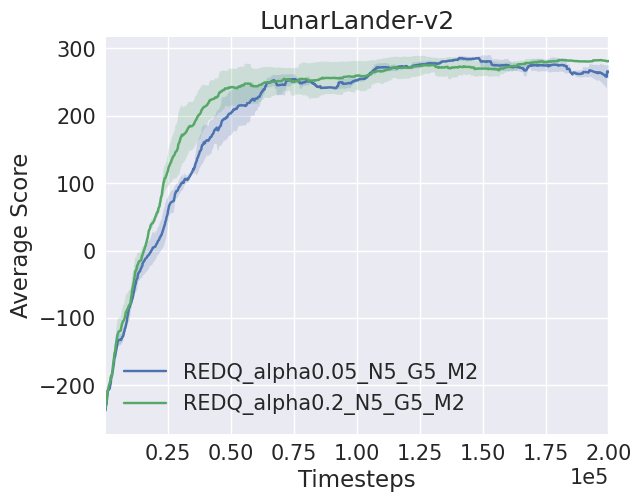

In [2]:
env_path_output = f"outputs/LunarLander-v2"
env_name = env_path_output.split("/")[-1]
make_plots([
    #  f"{env_path_output}/SAC_alpha0.05",
    #  f"{env_path_output}/SAC_alpha0.2",
     f"{env_path_output}/REDQ_alpha0.05_N5_G5_M2", 
     f"{env_path_output}/REDQ_alpha0.2_N5_G5_M2", 
    #  f"{env_path_output}/REDQ_alpha0.05_N10_G20_M2",
     ],
    xaxis="timesteps_history",
    legend=[
        # "SAC_alpha0.05", 
        # "SAC_alpha0.2", 
        "REDQ_alpha0.05_N5_G5_M2", 
        "REDQ_alpha0.2_N5_G5_M2", 
        # "REDQ_alpha0.05_N10_G20_M2"
            ],
    values=["score_history"],
    count=False,
    smooth=100,
    select=None,
    exclude=None,
    estimator="mean",
)
plt.title(env_name)
plt.xlabel("Timesteps")
plt.ylabel("Average Score")

Plotting from...

outputs/BipedalWalker-v3/REDQ_alpha0.05_N5_G5_M2
outputs/BipedalWalker-v3/REDQ_alpha0.2_N5_G5_M2

No file named config.json
Loaded data from outputs/BipedalWalker-v3/REDQ_alpha0.05_N5_G5_M2/experiment_2
No file named config.json
Loaded data from outputs/BipedalWalker-v3/REDQ_alpha0.05_N5_G5_M2/experiment_2_-31
No file named config.json
Loaded data from outputs/BipedalWalker-v3/REDQ_alpha0.05_N5_G5_M2/experiment_1_297
No file named config.json
Loaded data from outputs/BipedalWalker-v3/REDQ_alpha0.2_N5_G5_M2/experiment_1_-68
No file named config.json
Loaded data from outputs/BipedalWalker-v3/REDQ_alpha0.2_N5_G5_M2/experiment_2_-69


/home/amate/Documents/mai-upc/mai_venv/lib/python3.10/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(7.472222222222216, 0.5, 'Average Score')

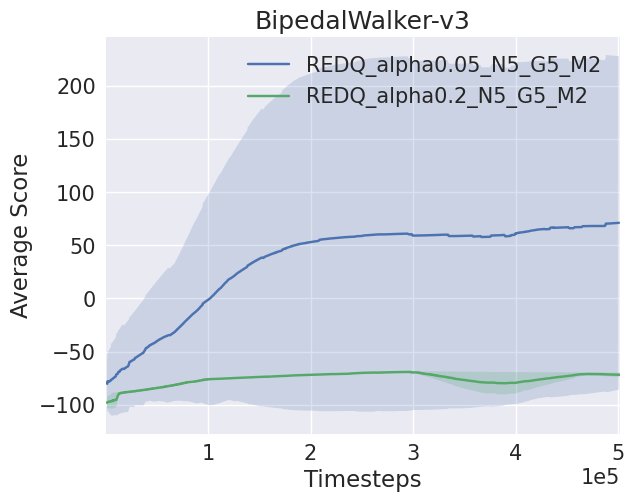

In [3]:
env_path_output = f"outputs/BipedalWalker-v3"
env_name = env_path_output.split("/")[-1]
make_plots([
    #  f"{env_path_output}/SAC_alpha0.05",
    #  f"{env_path_output}/SAC_alpha0.2",
     f"{env_path_output}/REDQ_alpha0.05_N5_G5_M2", 
     f"{env_path_output}/REDQ_alpha0.2_N5_G5_M2", 
    #  f"{env_path_output}/REDQ_alpha0.05_N10_G20_M2",
     ],
    xaxis="timesteps_history",
    legend=[
        # "SAC_alpha0.05", 
        # "SAC_alpha0.2", 
        "REDQ_alpha0.05_N5_G5_M2", 
        "REDQ_alpha0.2_N5_G5_M2", 
        # "REDQ_alpha0.05_N10_G20_M2"
            ],
    values=["score_history"],
    count=False,
    smooth=100,
    select=None,
    exclude=None,
    estimator="mean",
)
plt.title(env_name)
plt.xlabel("Timesteps")
plt.ylabel("Average Score")

# Video to plot


In [4]:
import cv2
import matplotlib.pyplot as plt
import datetime

def get_video_duration(video_path):
    video_capture = cv2.VideoCapture(video_path)
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))
    duration_seconds = total_frames / fps
    duration = datetime.timedelta(seconds=duration_seconds)
    video_capture.release()
    return duration


def create_frame_grid(video_path, n_cols, n_rows, frames_per_step='auto', title=None):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    
    # Get total number of frames and frame rate
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))
    
    # Calculate frames per step if 'auto' is specified
    if frames_per_step == 'auto':
        total_frames_needed = n_cols * n_rows
        frames_per_step = max(1, total_frames // total_frames_needed)
    
    # Initialize plot
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 9))  # Adjust figsize as needed
    
    # Get video duration
    duration = get_video_duration(video_path)
    duration = duration if duration.seconds > 60 else str(duration)[:-7]
    
    if title is None:
        title = f'Video Frame Grid ({n_rows} rows, {n_cols} columns)'
    else:
        title += f' ({duration})'
    fig.suptitle(title)
    
    current_frame = 0
    
    
    # Iterate over grid cells and plot frames
    for i in range(n_rows):
        for j in range(n_cols):
            # Read frame at current position
            video_capture.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
            ret, frame = video_capture.read()
            
            if ret:
                # Convert BGR frame to RGB for plotting
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
                # Plot frame on corresponding subplot
                axs[i, j].imshow(rgb_frame)
                axs[i, j].axis('off')
                
                # Calculate timestamp for the current frame
                frame_time_seconds = current_frame / fps
                frame_time = datetime.timedelta(seconds=frame_time_seconds)
                formatted_time = str(frame_time)[:-3] if len(str(frame_time)) > 7 else str(frame_time)
                # Set subplot title with the frame timestamp
                axs[i, j].set_title(formatted_time, fontsize=8)
                
                # Update current frame position
                current_frame += frames_per_step
                
                # Stop plotting if all frames are displayed
                if current_frame >= total_frames:
                    break
            else:
                break
    
    # Close video capture
    video_capture.release()
    
    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0.01, 1, 0.99])
    plt.show()




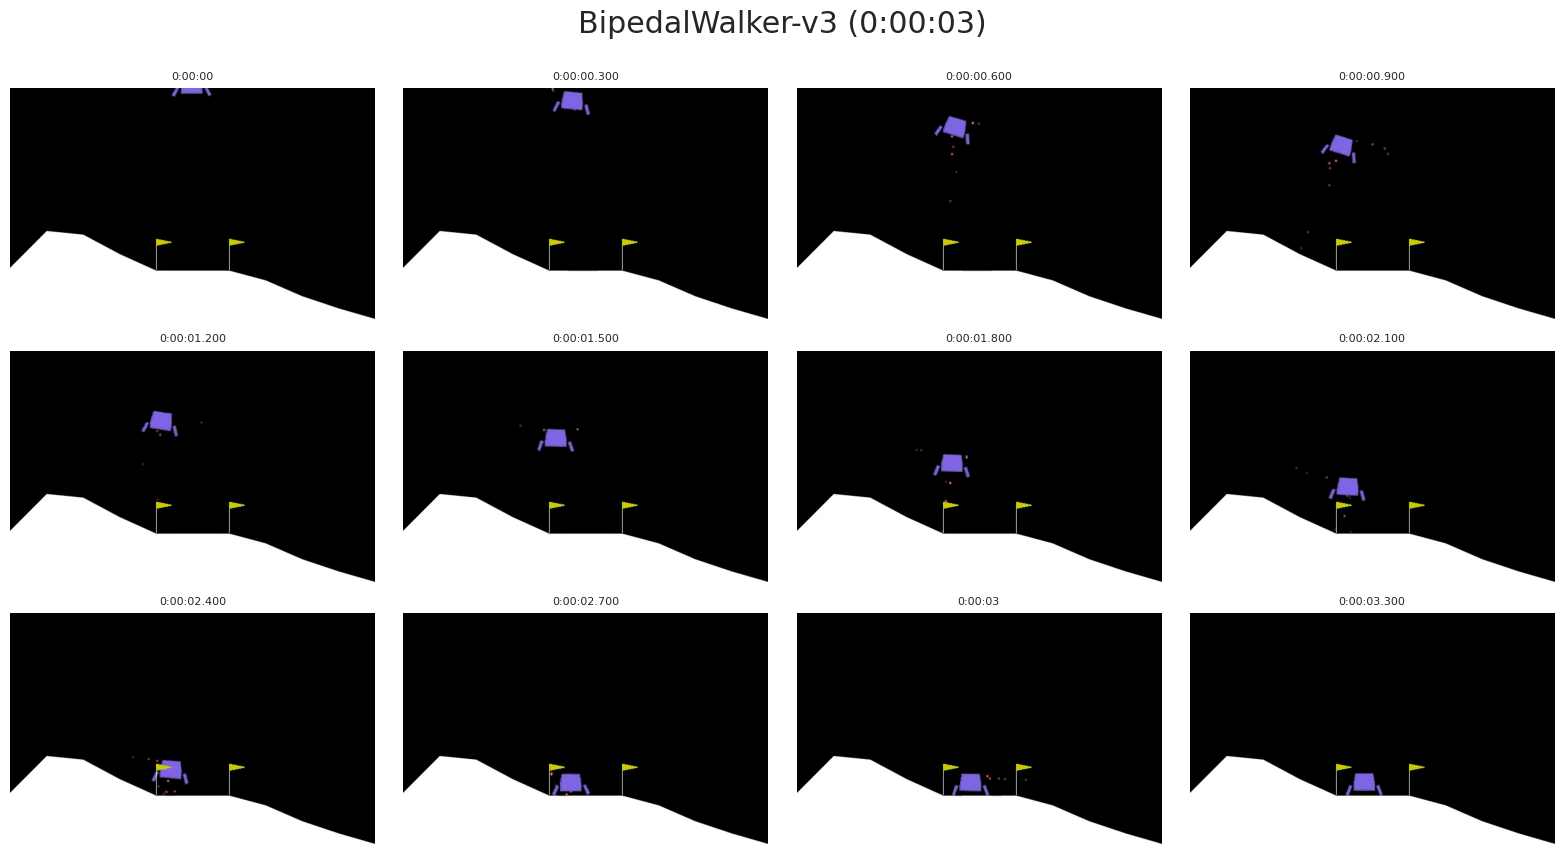

In [5]:
path_video = "outputs/LunarLander-v2/REDQ_alpha0.05_N5_G5_M2/experiment_2_283/video_train/rl-video-episode-880.mp4"

# Example usage:
n_cols = 4
n_rows = 3
frames_per_step = 'auto'  # or specify an integer value

create_frame_grid(path_video, n_cols, n_rows, frames_per_step, title="BipedalWalker-v3")


# Time plots


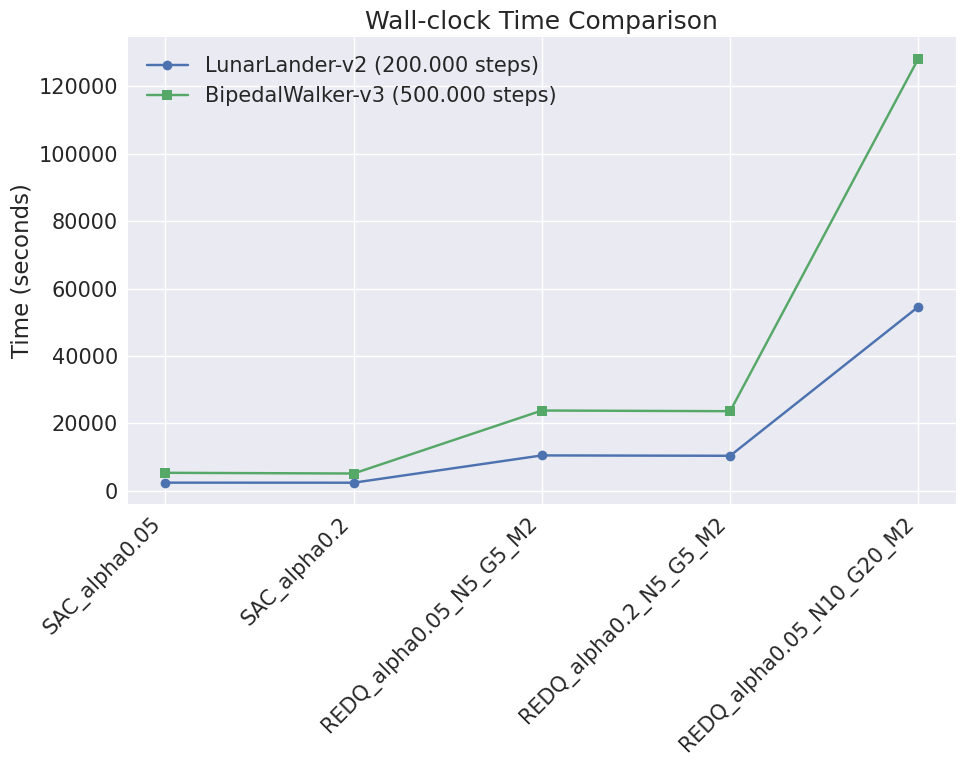

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the CSV file into a DataFrame
df = pd.read_csv('time.csv')

# Convert time durations from HH:MM:SS to total seconds for easier plotting
def time_to_seconds(t):
    h, m, s = map(int, t.split(':'))
    return h * 3600 + m * 60 + s

df['LunarLander-v2'] = df['LunarLander-v2'].apply(time_to_seconds)
df['BipedalWalker-v3'] = df['BipedalWalker-v3'].apply(time_to_seconds)

# Plotting the data
plt.figure(figsize=(10, 8))

# Plot LunarLander-v2 data
plt.plot(df['time'], df['LunarLander-v2'], marker='o', label='LunarLander-v2 (200.000 steps)')

# Plot BipedalWalker-v3 data
plt.plot(df['time'], df['BipedalWalker-v3'], marker='s', label='BipedalWalker-v3 (500.000 steps)')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.ylabel('Time (seconds)')
plt.title('Wall-clock Time Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
